Nome: Fabio Grassiotto

RA: 890441

Curso: IA901A



# Ex03 - Transformações de Intensidade (operações radiométricas)

Esta atividade tem 2 objetivos principais: 
  - entender o que são transformações radiométricas e como podem ser implementadas
  - explorar duas aplicações para as transformações radiométricas: normalização e segmentação. 

## Parte 1 - Manipulando imagens

O código abaixo lê a imagem *flower.pgm* que está armazenada na pasta **P_IA901A_2023S1/IA901A_Ex03** utilizando a biblioteca PIL/pillow, apresenta a imagem na tela e a transforma num array numpy.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


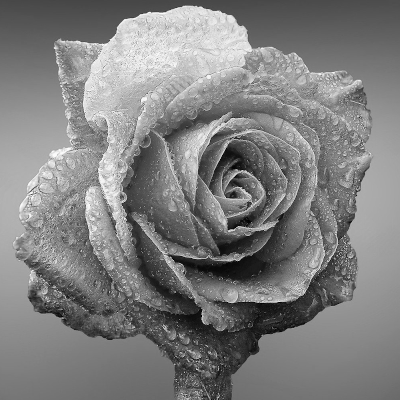

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


In [2]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img_file = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/flower.pgm"
img = Image.open(img_file)
display(img)

# Convertendo para um array do numpy
f=np.asarray(img)
print(f)

É bastante útil poder transformar Images em PIL em arrays numpy, e vice-versa. Isso permitirá que realizemos operações matriciais nas imagens e posteriormente possamos visualizar (e salvar em arquivos) as imagens processadas. 

### Exercício 3.1.1 

(a) Classifique a imagem como monocromática (binária, grayscale) ou multibanda (tentando identificar o padrão multibanda adotado). Descubra: qual a profundidade da imagem? Qual o maior e o menor valor de intensidade de pixel da imagem?


In [3]:
# Insira seu código aqui

print("Dimensão do array =", f.ndim)
print("Valor máximo = ", np.max(f))
print("Valor mínimo = ", np.min(f))


Dimensão do array = 2
Valor máximo =  253
Valor mínimo =  0


A imagem é monocromática, dado que o array f tem apenas duas dimensões. Notamos também que o valor máximo da intensidade de todos os pixels é 253, enquanto que o valor mínimo é 0.

(b) Leia a imagem *flower.pgm*, mostre na tela e transforme em um array numpy utilizando a biblioteca matplotlib.image. Exercite também o uso da barra de cores (colorbar).

Referência: [Tutorial Image Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) 

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


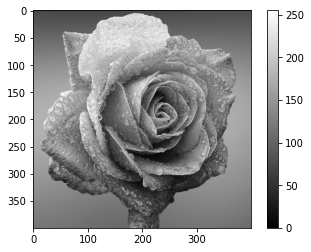

In [4]:
# Insira seu código aqui
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img_file = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/flower.pgm"
img = Image.open(img_file)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

# Convertendo para um array do numpy
f=np.asarray(img)
print(f)


(c) Usando atributos do tipo [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) da biblioteca `PIL`, tente responder as mesmas perguntas do item (a).

In [5]:
#Insira seu código aqui

print("Modo da imagem (Grayscale/RGB) = ", img.mode) 
print("Mínimo e máximo = ", img.getextrema())

Modo da imagem (Grayscale/RGB) =  L
Mínimo e máximo =  (0, 253)


A biblioteca PIL tem funções utilitárias que permitem obtermos as mesmas informações de forma muito conveniente. No código acima o modo da imagem **L** significa tons de cinza.

### Exercício 3.1.2

Imagine que eu ache que a imagem está um pouco clara demais e decido escurecê-la um pouco. Minha primeira ideia seria subtrair um valor de cada pixel, uma vez que valores menores correspondem a cores mais escuras. 

[[235 235 235 ... 241 240 240]
 [236 235 236 ... 241 241 241]
 [236 236 237 ... 241 241 242]
 ...
 [ 25  24  23 ...  14  14  13]
 [ 23  22  22 ...  13  13  13]
 [ 23  23  22 ...  13  13  13]]


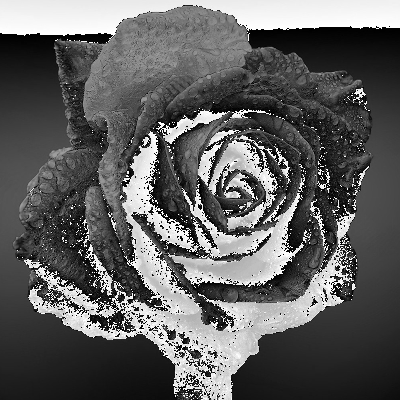

In [6]:
# Vou escurecer a imagem, subtraindo um valor dos pixels do array f.
g=f-93 
print(g)
# Agora vou transformar o array numa imagem PIL
g_img=Image.fromarray(g)
# E visualizar o resultado usando a função do PIL display
display(g_img)

(a) Porque a imagem ficou mais clara ao invés de mais escura? Explique porque ao subtrair um determinado valor de intensidade da imagem original algumas regiões da imagem ficaram saturadas em branco.

*RESPOSTA:*

A imagem ficou mais clara pois ao subtrair **93** de todos os valores da matriz, alguns ficaram negativos. Mas a matrix g está utilizando números no formato **uint8** (8 bits, sem sinal negativo) o que força que esses valores negativos sejam codificados como valores perto do máximo. O array criado da imagem permite, portanto, valores de 0 a 255. Portanto, a operação criou valores mais próximos de 255 em boa parte da imagem (todos valores que deveriam ser negativos).

In [7]:
print(g.dtype)

uint8


---
A principal mensagem é que podemos realizar operações quaisquer com os valores de pixel mas, no fim do dia, caso queiramos visualizar essas imagens, temos que pensar como esses valores serão mapeados para uma codificação que faça sentido no seu sistema computacional de apresentação.


(b) Tente refazer esta mesma operação de "escurecimento" da imagem através de subtração, sem que esse efeito de saturação aconteça.

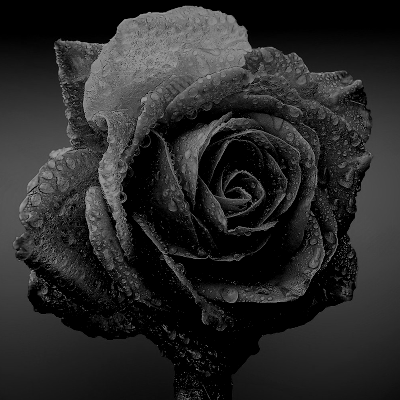

In [8]:
# Insira seu código aqui

f2 = np.zeros((400, 400), np.int16)
f2[:] = f

g2 = f2 - 93
np.clip(g2, 0, 255, out = g2)
new_g = g2.astype('uint8')

# Agora vou transformar o array numa imagem PIL
g2_img=Image.fromarray(new_g)
# E visualizar o resultado usando a função do PIL display
display(g2_img)

Para evitarmos a limitação do uso de inteiros positivos, criamos uma matriz de números inteiros negativos e positivos utilizando **int16** como o tipo da variável. Efetuamos a cópia dos valores da matriz inicial, executamos a subtração, substituimos os valores negativos por zero (clipping) e reformatamos a matriz para o tipo **uint8** para a plotagem da imagem.

## Parte 2 - Transformação de Intensidade

Tranformações de intensidade ou transformações rediométricas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Para entender como isso é implementado na prática, estudem atentamente o tutorial sobre Transformada de intensidade ([tutorial](https://github.com/lrittner/Computacao-Visual/blob/master/master/tutorial_ti_2.ipynb)).




[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


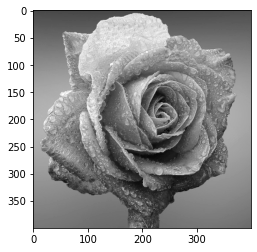

In [9]:
print(f)
plt.imshow(f,cmap='gray')

Vamos exercitar a aplicação de um mapeamento f = T[f] a partir de uma função de transformação T. No nosso caso, a função T será o negativo da imagem.

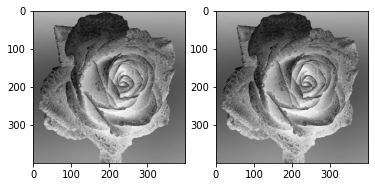

In [10]:
T = np.arange(256).astype('uint8')        # função identidade
T1 = 255 - T                              # criando a função negação a partir da identidade
#print(T1)
T2 = np.arange(255,-1,-1).astype('uint8') # criando diretamente a função negação
#print(T2)

plt.subplot(1,2,1)
f1 = T1[f]
plt.imshow(f1,cmap='gray')
plt.subplot(1,2,2)
f2 = T2[f]
plt.imshow(f2,cmap='gray')



### Exercício 3.2.1

Utilize transformações radiométricas para transformar a imagem e identificar o número da placa do carro apresentado na imagem abaixo. Explique seu raciocínio para chegar na solução.

In [11]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


float32


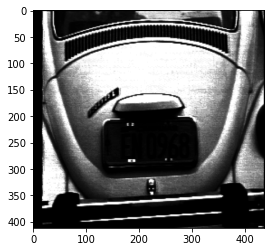

In [12]:
f = mpimg.imread(path+'fusca.png')  
plt.imshow(f, cmap='gray')
print(f.dtype)

O primeiro passo será analisar os dados de entrada após a leitura da imagem no array f.

In [13]:
print("Dimensão do array =", f.ndim)
print("Valor máximo = ", np.max(f))
print("Valor mínimo = ", np.min(f))

print(f)

Dimensão do array = 2
Valor máximo =  0.6745098
Valor mínimo =  0.0
[[0.         0.         0.         ... 0.16862746 0.01176471 0.        ]
 [0.         0.         0.         ... 0.1882353  0.01568628 0.        ]
 [0.         0.         0.         ... 0.22745098 0.01568628 0.        ]
 ...
 [0.         0.         0.         ... 0.17254902 0.01176471 0.        ]
 [0.         0.         0.         ... 0.04705882 0.00392157 0.        ]
 [0.         0.         0.         ... 0.00784314 0.         0.        ]]


Nota-se que a leitura da imagem está criando um array de floats no intervalo [0, 1], de uma imagem em tons de cinza. Para facilitar a manipulação dos dados, executamos a conversão para inteiro no intervalo [0, 255] das intensidades de tons de cinza.

In [14]:
f_int = np.array(f * 255, dtype = np.uint8)
print(f_int)

[[ 0  0  0 ... 43  3  0]
 [ 0  0  0 ... 48  4  0]
 [ 0  0  0 ... 58  4  0]
 ...
 [ 0  0  0 ... 44  3  0]
 [ 0  0  0 ... 12  1  0]
 [ 0  0  0 ...  2  0  0]]


Após a conversão, analisamos o histograma da imagem obtido:

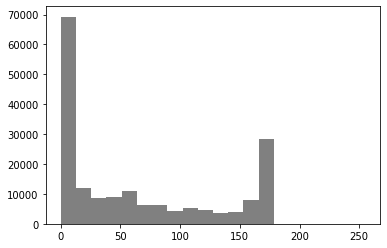

In [15]:
# Análise do histograma

def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)

nbins = 20
h, bin_edges = np.histogram(f_int, nbins,(0,255))
plota_hist(h, 'gray', nbins, bin_edges)

Analisando o histograma, notamos que existe uma concentração muito grande de pixels escuros, na faixa de intensidade baixa (0 a 10), e outra concentração na faixa de intensidade média (acima de 160).
Portanto, uma opção aqui é utilizar uma transformação window-level para melhorar a proporção de contrastes na faixa mais escura.

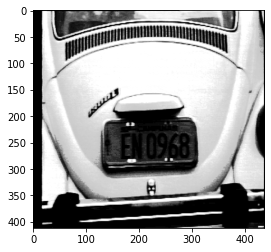

In [16]:
# Ajuste window level
r1 = 20
r2 = 170
s1 = 200
s2 = 255

def T1(vPix):
    if (0 <= vPix and vPix <= r1):
        return (s1 / r1)*vPix
    elif (r1 < vPix and vPix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (vPix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (vPix - r2) + s2

(lines, cols) = np.shape(f_int)

f_new = np.zeros((lines, cols), dtype='uint8')
for l in range(lines):
  for c in range(cols):
    f_new[l, c] = T1(f_int[l, c])

plt.imshow(f_new, cmap='gray')

Ao executar a operação de *window-level* pudemos ampliar a resolução das faixas de contraste da imagem nos toms mais escuros e desta forma visualizar a placa do carro.

### Exercício 3.2.2

Uma das possíveis aplicações das transformações radiométricas é a segmentação de imagens, onde destacamos um objeto de interesse dos demais objetos (ou do fundo). 

(a) A imagem abaixo mostra duas bolachas. Escolha um valor de limiar (threshold) para separar a bolacha do fundo da imagem. Crie uma função de transformação T e aplique esta transformação para obter os objetos de interesse (bolachas) pintados de branco e o fundo em preto.

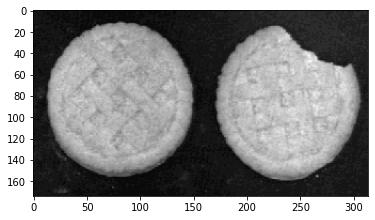

In [17]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
file_c = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex03/cookies.pgm"
plt.subplot(111)  
f = mpimg.imread(file_c)  
plt.imshow(f,cmap='gray')


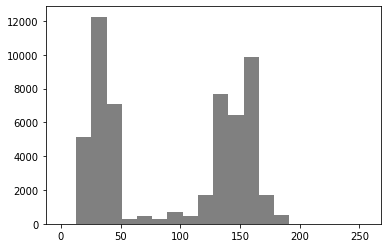

In [18]:
# Insira seu código aqui
# Análise o histograma

nbins = 20
h, bin_edges = np.histogram(f, nbins,(0,255))
plota_hist(h, 'gray', nbins, bin_edges)

Como a separação de tons é bem clara no histograma, podemos escolher um valor de 100 como limiar de separação.

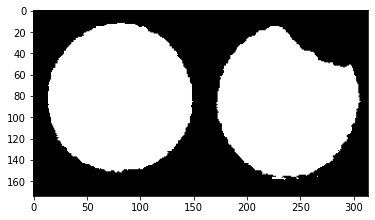

In [19]:
def T_sep(vPixel):
  if (vPixel >= 100):
    return 255
  else:
    return 0

(lines, cols) = np.shape(f)

f_new = np.zeros((lines, cols), dtype='uint8')
for l in range(lines):
  for c in range(cols):
    f_new[l, c] = T_sep(f[l, c])

plt.imshow(f_new, cmap='gray')

Através da análise do histograma, verificamos que existe uma separação clara de picos, então conseguimos executar uma substituição simples dos valores para obter uma nova imagem binária conforme solicitado.

### Exercício 3.2.3 

Leia a apresente a imagem `orquideafeec-calua.jpg`. Execute processamentos de intensidade nas diferentes bandas da imagem (R, G, B) e apresente o resultado. É possível segmentar a flor da orquídea usando uma única banda de cor?

Dica: exemplos disponíveis em [Applying point transforms e Processing individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement)

In [20]:
from PIL import Image

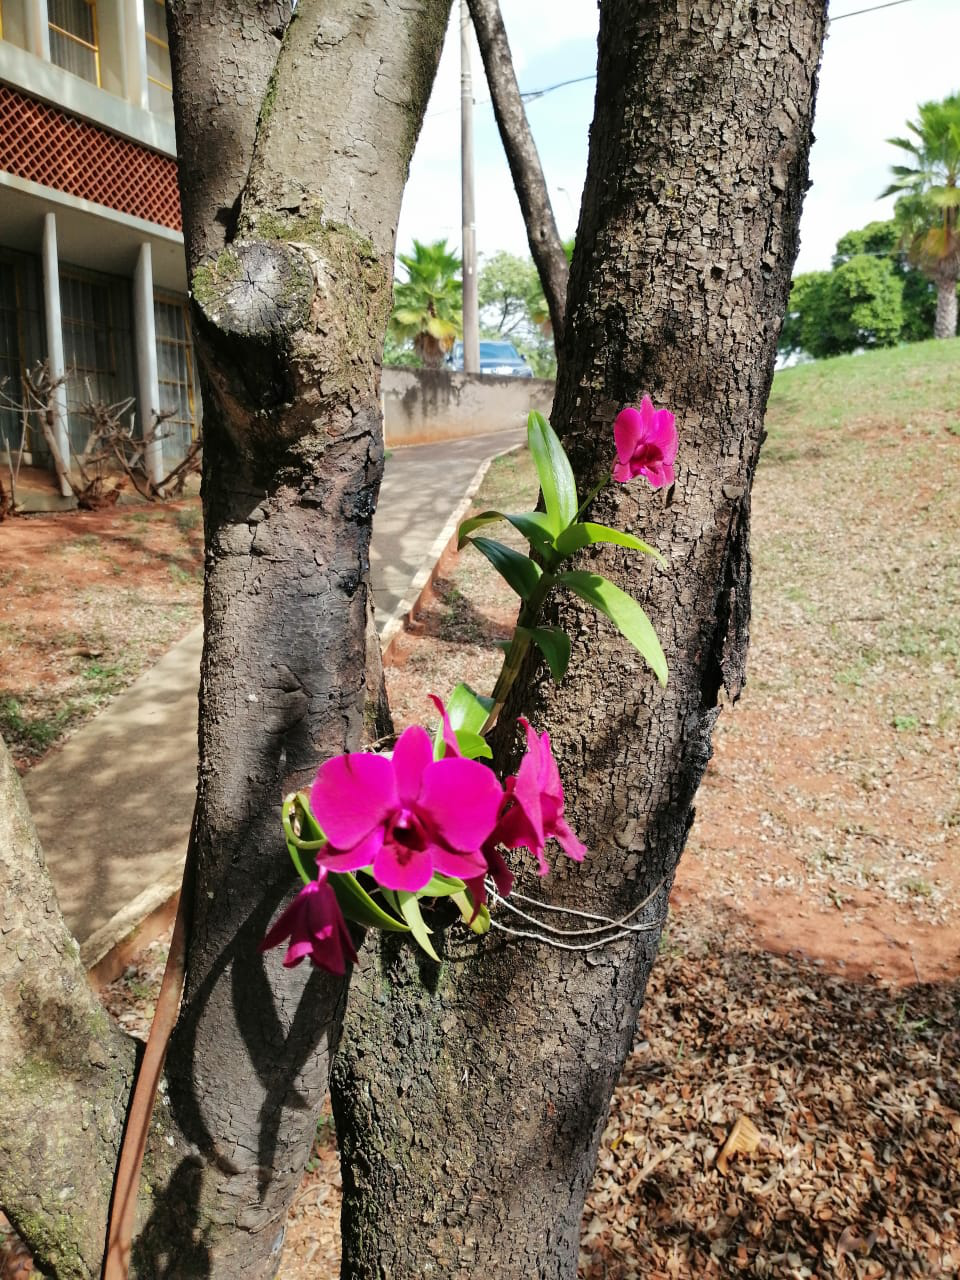

In [21]:
img = Image.open(path+"/orquideafeec-calua.jpeg")
img.show()

O primeiro passo será visualizar os histogramas dos canais RGB da imagem fornecida.

In [22]:
# Divisão dos canais
source = img.split()

R, G, B = 0, 1, 2

r = np.asarray(source[R])
g = np.asarray(source[G])
b = np.asarray(source[B])

In [23]:
# Visualização dos histogramas dos canais separados

def plota_hist_mult(h,cor,nbins,bin_edges, ax):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    ax.bar(bin_centers, h, width=w, color=cor)

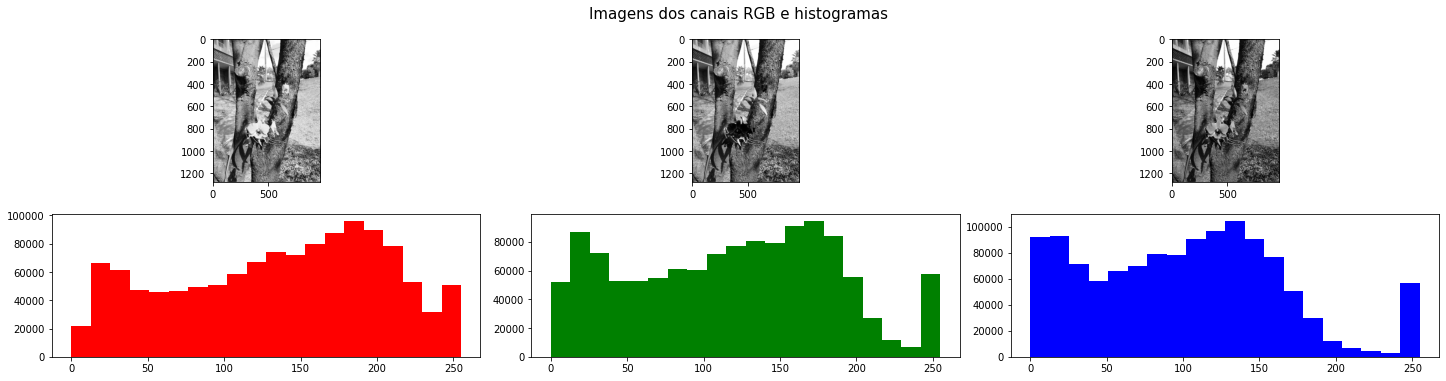

In [24]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 5)
fig.tight_layout(w_pad=2)
fig.suptitle('Imagens dos canais RGB e histogramas', fontsize=15, y=1.05)

h_r, bin_edges_r = np.histogram(r, nbins,(0,255))
h_g, bin_edges_g = np.histogram(g, nbins,(0,255))
h_b, bin_edges_b = np.histogram(b, nbins,(0,255))

ax[0, 0].imshow(r, cmap='gray')
ax[0, 1].imshow(g, cmap='gray')
ax[0, 2].imshow(b, cmap='gray')

plota_hist_mult(h_r, 'red', nbins, bin_edges_r, ax[1, 0])
plota_hist_mult(h_g, 'green', nbins, bin_edges_g, ax[1, 1])
plota_hist_mult(h_b, 'blue', nbins, bin_edges_b, ax[1, 2])

Nota-se que a utilizando os canais RGB da imagem, a separação do tom de cor da flor não é facilmente identificado. Portanto, este formato de descrição de cores não é indicado para a solução desse tipo de problema.

Uma possibilidade seria a conversão do sistema de cores de RGB para HSV (matiz, saturação, valor). Uma vez que a cor das flores é lilás, deve aparecer de forma bem marcada neste sistema de cores.

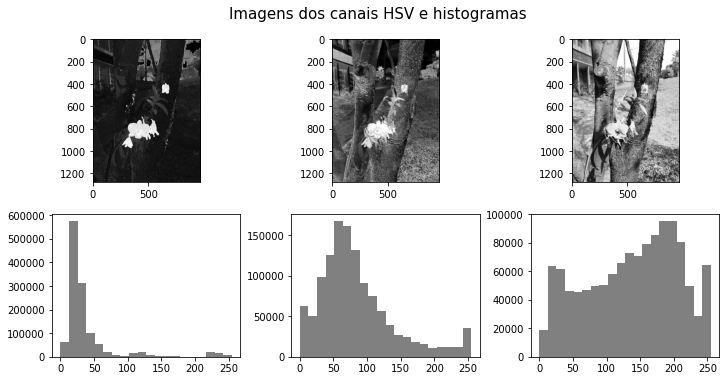

In [25]:
imgHSV = img.convert('HSV')
sourceHSV = imgHSV.split()

H, S, V = 0, 1, 2

h = np.asarray(sourceHSV[H])
s = np.asarray(sourceHSV[S])
v = np.asarray(sourceHSV[V])

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, 5)
fig.tight_layout(w_pad=2)
fig.suptitle('Imagens dos canais HSV e histogramas', fontsize=15, y=1.05)

h_h, bin_edges_h = np.histogram(h, nbins,(0,255))
h_s, bin_edges_s = np.histogram(s, nbins,(0,255))
h_v, bin_edges_v = np.histogram(v, nbins,(0,255))

ax[0, 0].imshow(h, cmap='gray')
ax[0, 1].imshow(s, cmap='gray')
ax[0, 2].imshow(v, cmap='gray')

plota_hist_mult(h_h, 'gray', nbins, bin_edges_h, ax[1, 0])
plota_hist_mult(h_s, 'gray', nbins, bin_edges_s, ax[1, 1])
plota_hist_mult(h_v, 'gray', nbins, bin_edges_v, ax[1, 2])

Efetivamente, no histograma da matriz de matizes (*hue*, canal h acima) podemos verificar que a cor da flores aparece de forma bem marcada em seus valores mais altos. Portanto, podemos utilizar este subcanal para gerar uma imagem que seleciona apenas os pixels com esta cor, utilizando a função Image.point().

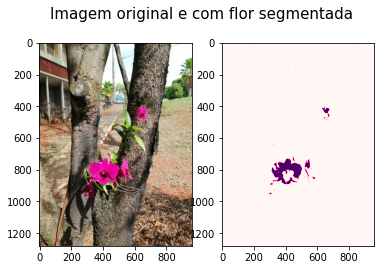

In [37]:
mask_h = sourceHSV[H].point(lambda i: (i > 215 and i < 230) and 255)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Imagem original e com flor segmentada', fontsize=15)

ax[0].imshow(img)
ax[1].imshow(mask_h, cmap='RdPu')

### Conclusões

Algumas conclusões que pude verificar na resolução dos exercícios propostos foram:

*   É importante visualizar os formatos de armazenamento em memória de imagens, assim como o tamanho das variáveis ao se manipular dados de forma numérica.
*   A biblioteca Pillow facilita bastante os processos de manipulação de imagens em python.
*   Os formatos de codificação de cor podem facilitar muito o processamento de tarefas de manipulação de imagem.


